# Student-contributed examples
These were contributed by students in previous classes

## Justin's MinFluidProcess example
Contributed by a student in an earlier class at the DOE research lab in Morganton, WV

Index(['Date', 'Time', 'PT-5030', 'PDT-5090', 'TE-5024', 'TE-5070', 'TE-5071',
       'TE-5072', 'TE-5080', 'TE-5081', 'FTC-1100', 'FTC-2100', 'FTC-3100',
       'FTC-5238', 'PDT-5103', 'PT-5070', 'TE-5082', 'TE-5086'],
      dtype='object')


/Users/jstrick/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less_equal


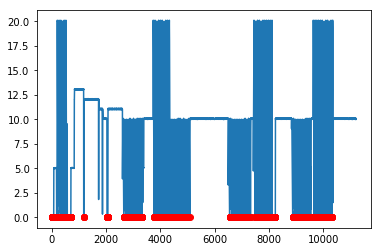

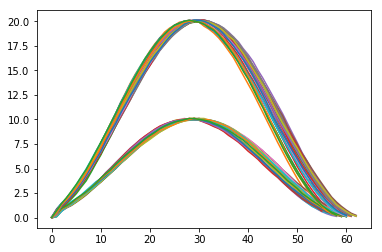

[(303, 362), (366, 424), (428, 488), (491, 551), (2787, 2846), (2851, 2913), (2985, 3045), (3120, 3180), (3186, 3247), (3774, 3836), (3841, 3902), (3906, 3967), (3971, 4033), (4037, 4100), (4104, 4166), (4170, 4231), (4236, 4297), (4301, 4360), (4435, 4495), (4501, 4560), (4566, 4626), (4631, 4693), (4830, 4890), (5029, 5085), (6695, 6755), (6761, 6821), (6826, 6887), (7025, 7085), (7091, 7151), (7157, 7218), (7487, 7549), (7553, 7615), (7619, 7681), (7685, 7747), (7751, 7813), (7817, 7880), (7953, 8014), (8018, 8080), (8947, 9008), (9013, 9074), (9278, 9338), (9344, 9404), (9410, 9471), (9672, 9734), (9738, 9801), (9805, 9866), (9870, 9931), (9935, 9997), (10001, 10064), (10068, 10129), (10133, 10194), (10198, 10257), (10261, 10320)]


In [6]:
import pandas
import numpy as np
import matplotlib.pyplot as plt


class MinFluidProcess(object):
    def __init__(self,fname):    
        self.data=pandas.read_csv(fname) 

    def getKeys(self):
        return self.data.keys()
        
    def plot(self,*keys):
        for key in keys:
            plt.plot(self.data[key])
        plt.show()

    def findZeros(self, key, plot=False):
        subData=self.data[key].values
        self.zeros=np.where(subData<=0.1)
        if plot:
            plt.plot(self.data[key])
            plt.plot(self.zeros,range(len(self.zeros)),'ro')
            plt.show()
        
    def split(self, key, plot=False):
        self.findZeros(key,plot)
        goodRanges=[]
        for i in range(len(self.zeros[0])-1):
            if self.zeros[0][i]!=self.zeros[0][i+1]-1:
                intr=(self.zeros[0][i],self.zeros[0][i+1])
                rawWF = self.data[key].values[intr[0]:intr[1]]
                if np.sum(np.isnan(rawWF)) == 0:
                    scaledWF= np.array(rawWF/max(rawWF))
                    scaledX = np.array(range(len(rawWF)))/float(len(rawWF))
                    cosine=np.array([1-(np.cos(2*np.pi*x)+1)/2.0 for x in scaledX])
                    rSquared = np.sum(np.power((scaledWF-cosine),2))
                    if rSquared <=.4:
                        goodRanges.append(intr)
                        if plot:
                            plt.plot(rawWF)

        plt.show()
        return goodRanges


minFluid=MinFluidProcess('../DATA/2013-01-28 072316.csv')
print(minFluid.getKeys())
minFluid.findZeros('FTC-1100')
print(minFluid.split('FTC-1100',plot=True))

## CIRA NetCDF Example
This example plots temperature C vs pressure, with a logarithmic scale for pressure. 

_Thanks to John Knaff and the rest of the class at CIRA for providing data and suggestions_

/Users/jstrick/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:25: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/Users/jstrick/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:26: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


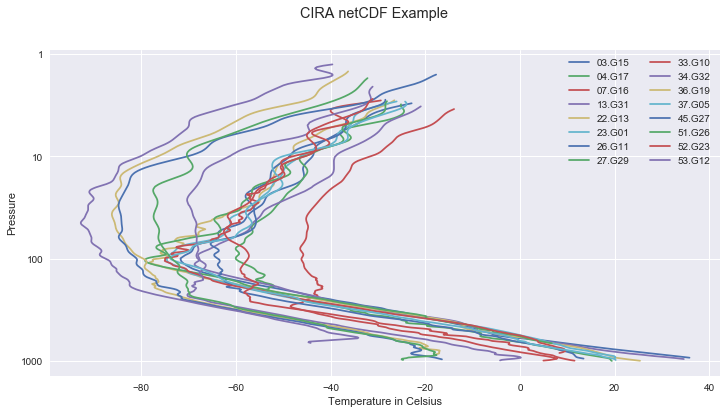

In [1]:
import os
import numpy as np

from matplotlib import pyplot as plt
import netCDF4
from matplotlib.ticker import ScalarFormatter
import seaborn
seaborn.set()

DATA_DIR = '../DATA/wetprf'

for file_name in sorted(os.listdir(DATA_DIR)):
    if file_name.startswith('wetPrf') :
        plot_label = file_name[24:30]
        full_path = os.path.join(DATA_DIR, file_name)
    
        nc = netCDF4.Dataset(full_path)
    
        temps = nc.variables['Temp'][:]
        pressures = nc.variables['Pres'][:]
        
        temps_mask =  temps.mask
        pressures_mask = pressures.mask
        
        temps[temps_mask] = np.nan
        pressures[pressures_mask] = np.nan
        
        plt.plot(temps, pressures, label=plot_label)

plt.ylabel('Pressure')
plt.xlabel('Temperature in Celsius')
plt.legend(loc="upper right", ncol=2)

fig = plt.gcf()
fig.suptitle("CIRA netCDF Example")
fig.set_size_inches(12, 6)

ax = plt.gca()
ax.set_yscale('log')
ax.invert_yaxis()
ax.yaxis.set_major_formatter(ScalarFormatter())

fig.savefig('cira_netcdf.png',dpi=300)

plt.show()